# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sinasc = pd.read_csv('sinasc_RO_2019.csv')

In [3]:
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [6]:
sinasc.loc[sinasc['APGAR5'] <= 3, 'APGAR5_cat'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5'] >= 4) & (sinasc['APGAR5'] <= 5),'APGAR5_cat'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] >= 6) & (sinasc['APGAR5'] <= 7),'APGAR5_cat'] = 'asfixia leve'
sinasc.loc[sinasc['APGAR5'] > 8, 'APGAR5_cat'] = 'normal'

# criando as categorias solicitadas

In [8]:
sinasc['APGAR5_cat'].value_counts()

# verificando se as categorias foram aplicadas conforme solicitado

normal              24469
asfixia leve          320
asfixia grave          74
asfixia moderada       68
Name: APGAR5_cat, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<Axes: xlabel='SEXO', ylabel='APGAR5'>

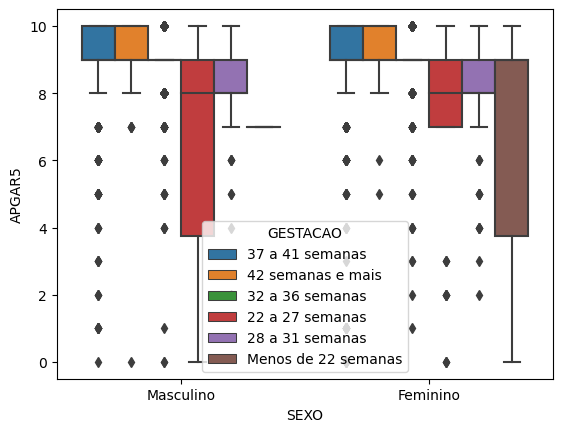

In [15]:
sns.boxplot(data = sinasc, 
            y="APGAR5", 
            x="SEXO", 
            orient="v", 
            hue='GESTACAO'
           
           )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [17]:
freq_ges_ap = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5']) # criando uma crosstab
freq_ges_ap

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [21]:
freq_ges_ap_pct = freq_ges_ap.div(freq_ges_ap.sum(axis = 1), axis = 0) # calculando percentuais
freq_ges_ap_pct

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

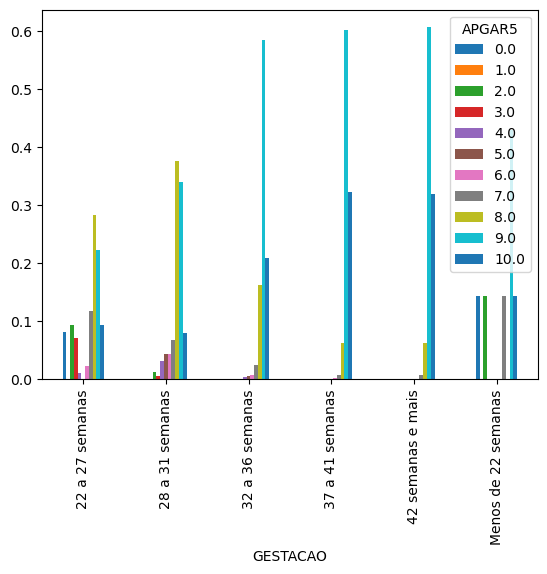

In [26]:
freq_ges_ap_pct.plot.bar() #plotando o gráfico da crosstab

In [27]:
sinasc['GESTACAO'].value_counts() # identificando as categorias de GESTACAO

37 a 41 semanas        22589
32 a 36 semanas         2249
42 semanas e mais        700
28 a 31 semanas          165
22 a 27 semanas           86
Menos de 22 semanas        7
Name: GESTACAO, dtype: int64

"Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas." Com base nos dados observados é possível afirmar que:
 
 - 1) A grande maioria dos bebês nascem com apgar5 na categoria normal (superior a 8) e com 37 semanas.
 - 2) A grande maioria dos bebês que nascem a partir de 37 semanas ou mais, 60% têm apgar5 = 9, como observado na crosstab.
 - 3) Considerando que o índice de Apgar5 avalia os aspectos biológicos do bebê ao nascer e que o amadurecimente de determinadas habilidades primevas traz co maté 42 semanas, é possível afirmar que o bebê que nasce com gestação anterior a 37 semanas é prematuro pois a frequência de apgar5 acima de 8 tendem a ser menores.
 - 4) No entanto, quando observadas as barras com categoria de GESTAÇÂO - 32 a 36 semanas, o indice de apgar parece corroborar a afirmação dos médicos mas de forma parcial. OU seja, bebês que nascem dentro da categoria nascem com apgar5 acima de 8.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [31]:
freq_sx_ap = pd.crosstab(sinasc['PESO'], sinasc['APGAR5']) # crosstab das variáveis colocando apgar5 em coluna
freq_sx_ap

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
PESO,,,,,,,,,,,
258,0,0,0,0,0,0,0,0,0,1,0
285,0,0,0,0,0,0,0,0,0,0,1
292,0,0,0,0,0,0,0,0,0,1,0
295,0,0,0,0,0,0,0,0,0,1,0
305,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5190,0,0,0,0,0,0,0,0,0,1,0
5470,0,0,0,0,0,0,0,0,0,1,0
5480,0,0,0,0,0,0,0,0,0,1,0


In [32]:
freq_sx_ap_pct = freq_sx_ap.div(freq_sx_ap.sum(axis = 1), axis = 0) # verificando porcentagem
freq_sx_ap_pct

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
PESO,,,,,,,,,,,
258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
sinasc.PESO.value_counts().sort_values() # identificando a maior frequencia entre os valores

2352      1
2196      1
3142      1
910       1
3586      1
       ... 
3350    166
3000    169
3250    173
3500    177
3300    188
Name: PESO, Length: 1476, dtype: int64

In [37]:
sinasc.PESO.describe() # identificando algumas medidas estatísticas da variável

count    27028.000000
mean      3243.190654
std        544.754096
min        258.000000
25%       2965.000000
50%       3270.000000
75%       3575.000000
max       5985.000000
Name: PESO, dtype: float64

In [39]:
sinasc.PESO.isna().value_counts() # verificando a consistência dos dados de peso. não há NA

False    27028
Name: PESO, dtype: int64

In [40]:
# usando a distribuição dos quartis para categorizar a variável PESO e reduzir o tamanho da crosstab

sinasc.loc[sinasc['PESO'] <= 2965.000000, 'PESO_cat'] = 'leve'
sinasc.loc[(sinasc['PESO'] > 2965.000000) & (sinasc['PESO'] <= 3270.000000),'PESO_cat'] = 'medio'
sinasc.loc[(sinasc['PESO'] > 3270.000000) & (sinasc['PESO'] <= 3575.000000),'PESO_cat'] = 'pesado'
sinasc.loc[sinasc['PESO'] > 3575.000000, 'PESO_cat'] = 'muito pesado'

In [49]:
freq_kg_ap = pd.crosstab(sinasc['PESO_cat'], sinasc['APGAR5'])
freq_kg_ap

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
PESO_cat,,,,,,,,,,,
leve,12,9,15,11,16,25,35,108,760,3969,1787
medio,3,3,0,2,3,5,14,49,385,3975,2279
muito pesado,1,6,3,1,1,7,17,46,454,4161,2032
pesado,1,6,0,1,3,8,13,38,395,3971,2295


In [42]:
freq_kg_ap_pct = freq_kg_ap.div(freq_kg_ap.sum(axis = 1), axis = 0) # verificando porcentagem
freq_kg_ap_pct

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
PESO_cat,,,,,,,,,,,
leve,0.001779,0.001334,0.002223,0.001630,0.002371,0.003705,0.005187,0.016007,0.112643,0.588261,0.264858
medio,0.000447,0.000447,0.000000,0.000298,0.000447,0.000744,0.002084,0.007294,0.057309,0.591694,0.339238
muito pesado,0.000149,0.000892,0.000446,0.000149,0.000149,0.001040,0.002526,0.006836,0.067469,0.618368,0.301977
pesado,0.000149,0.000891,0.000000,0.000149,0.000446,0.001189,0.001931,0.005646,0.058684,0.589957,0.340960


<Axes: xlabel='PESO_cat'>

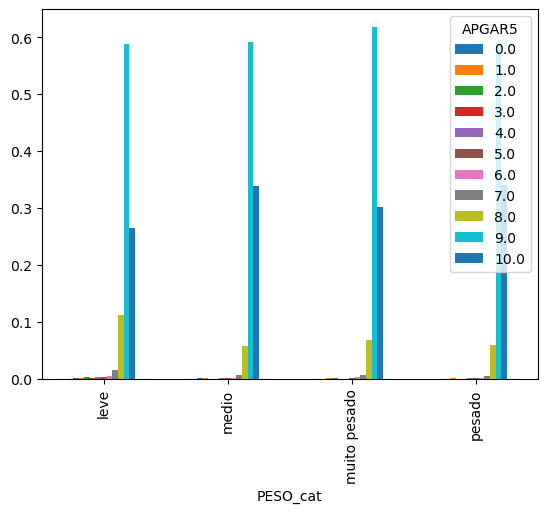

In [54]:
freq_kg_ap_pct.plot.bar()

"Veja se há relação entre APGAR5 e o peso do bebê." Com base nos dados categorizados e observados.

- 1) É possível observar frequencias de índices e APGAR superiores a 8 em todas as categorias
- 2) O peso parece ter pouca inferência sobre o índice de APGAR5.